Being new to programming, I thought it would be interesting to look through the history of Stack Overflow User Surveys.  They have all of the survey data posted to their website, from 2011 to 2021.  My main focus was to look at the languages that respondants said they worked with.  My hypothesis was that Over the past 11 years, Python went from being a lesser used to a commonly used programming language.

I read in all of the `Stack Overflow Survey Results` on their website using pandas: https://insights.stackoverflow.com/survey

In [1]:
import pandas as pd
import numpy as np
import operator

survey_2011 = pd.read_csv("2011 Stack Overflow Survey Results.csv", encoding='Latin-1')
survey_2012 = pd.read_csv("2012 Stack Overflow Survey Results.csv", encoding='Latin-1')
survey_2013 = pd.read_csv("2013 Stack Overflow Survey Responses.csv", encoding='Latin-1')
survey_2014 = pd.read_csv("2014 Stack Overflow Survey Responses.csv", encoding='Latin-1')
survey_2015 = pd.read_csv("2015 Stack Overflow Developer Survey Responses.csv", encoding='Latin-1')
survey_2016 = pd.read_csv("2016 Stack Overflow Survey Responses.csv", encoding='Latin-1')
survey_2017 = pd.read_csv("2017_survey_results_public.csv", encoding='Latin-1')
survey_2018 = pd.read_csv("2018_survey_results_public.csv", encoding='Latin-1')
survey_2019 = pd.read_csv("2019_survey_results_public.csv", encoding='Latin-1')
survey_2020 = pd.read_csv("2020_survey_results_public.csv", encoding='Latin-1')
survey_2021 = pd.read_csv("2021_survey_results_public.csv", encoding='Latin-1')

pd.set_option('display.max_columns', None)

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,8

A quick look at the different surveys revealed the questions pertaining to Languages used changed over the years.  the first 5 years (2011-2015), each language had its own column.  If the respondent used that language, the value would be marked with the name of the language, if not it would be marked `NaN`.  below are the two different examples. 

In [2]:
survey_2011.loc[1:, 'Which languages are you proficient in?' : 'Unnamed: 40']

,Which languages are you proficient in?,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
1,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN
3,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN
4,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Java,JavaScript,CSS,PHP,NaN,NaN,SQL,NaN,C++,C,Perl
...,...,...,...,...,...,...,...,...,...,...,...
2809,NaN,JavaScript,CSS,NaN,NaN,NaN,SQL,C#,C++,C,NaN
2810,NaN,JavaScript,CSS,NaN,NaN,NaN,SQL,C#,NaN,NaN,NaN
2811,NaN,JavaScript,CSS,PHP,NaN,NaN,SQL,C#,NaN,NaN,NaN
2812,NaN,JavaScript,NaN,PHP,Python,NaN,SQL,NaN,NaN,NaN,Perl


In [3]:
survey_2017.loc[:, 'HaveWorkedLanguage']

0                                             Swift
1                     JavaScript; Python; Ruby; SQL
2                                 Java; PHP; Python
3                            Matlab; Python; R; SQL
4                                               NaN
                            ...                    
51387      C#; JavaScript; Python; SQL; VB.NET; VBA
51388                                     Java; SQL
51389                                           NaN
51390                        JavaScript; PHP; Swift
51391    Java; JavaScript; PHP; Python; Ruby; Swift
Name: HaveWorkedLanguage, Length: 51392, dtype: object

My first step to cleaning up the datasets was to isolate the columns that contained the languages respondants worked with the datasets that only contained one column i added the `dropna()` method to clear any respondants that did not answer the question about programming languages.

In [4]:
languages_2011 = pd.DataFrame(survey_2011.loc[1:, 'Which languages are you proficient in?' : 'Unnamed: 40'])
languages_2012 = pd.DataFrame(survey_2012.loc[:, 'Which languages are you proficient in?' :'Unnamed: 35'])
languages_2013 = pd.DataFrame(survey_2013.loc[:, 'Which of the following languages or technologies have you used significantly in the past year?' : 'Unnamed: 68'])
languages_2014 = pd.DataFrame(survey_2014.loc[:, 'Which of the following languages or technologies have you used significantly in the past year?' :'Unnamed: 53'])
languages_2015 = pd.DataFrame(survey_2015.loc[:, 'Select all that apply':'Unnamed: 49'])
languages_2016 = pd.DataFrame(survey_2016['tech_do'].dropna())
languages_2017 = pd.DataFrame(survey_2017['HaveWorkedLanguage'].dropna())
languages_2018 = pd.DataFrame(survey_2018['LanguageWorkedWith'].dropna())
languages_2019 = pd.DataFrame(survey_2019['LanguageWorkedWith'].dropna())
languages_2020 = pd.DataFrame(survey_2020['LanguageWorkedWith'].dropna())
languages_2021 = pd.DataFrame(survey_2021['LanguageHaveWorkedWith'].dropna())

I wanted to have the raw data availabe on my Github Page in case someone wanted to look over my code.  Some of the full survey CSV files were big, so after I isolated the language columns, I exported them as seperate CSV files. That's what's happening in the cell below.

In [5]:
# languages_2011.to_csv('2011_languages_isolated', index=False)
# languages_2012.to_csv('2012_languages_isolated', index=False)
# languages_2013.to_csv('2013_languages_isolated', index=False)
# languages_2014.to_csv('2014_languages_isolated', index=False)
# languages_2015.to_csv('2015_languages_isolated', index=False)
# languages_2016.to_csv('2016_languages_isolated', index=False)
# languages_2017.to_csv('2017_languages_isolated', index=False)
# languages_2018.to_csv('2018_languages_isolated', index=False)
# languages_2019.to_csv('2019_languages_isolated', index=False)
# languages_2020.to_csv('2020_languages_isolated', index=False)
# languages_2021.to_csv('2021_languages_isolated', index=False)

#laptops.to_csv('laptops_cleaned.csv', index=False)

After creating the new dataframes, I decided to rename the columns. This wouldn't immediately help with the project, but if I encountered problems it would make going back and checking on the datasets faster if it was easier to read. The next three cells are as followed: an example of one dataframe before being cleaned, the code used to clean the data up, and then a printout of the cleaned columns.

Note: Only 2011-2015 needed to be worked on since they were the only datasets with multiple columns.

In [6]:
languages_2011

,Which languages are you proficient in?,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
1,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN
3,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN
4,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Java,JavaScript,CSS,PHP,NaN,NaN,SQL,NaN,C++,C,Perl
...,...,...,...,...,...,...,...,...,...,...,...
2809,NaN,JavaScript,CSS,NaN,NaN,NaN,SQL,C#,C++,C,NaN
2810,NaN,JavaScript,CSS,NaN,NaN,NaN,SQL,C#,NaN,NaN,NaN
2811,NaN,JavaScript,CSS,PHP,NaN,NaN,SQL,C#,NaN,NaN,NaN
2812,NaN,JavaScript,NaN,PHP,Python,NaN,SQL,NaN,NaN,NaN,Perl


In [7]:
columns_2011 = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
languages_2011.columns = columns_2011

columns_2012 = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Objective-C', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl', 'HTML5', 'None']
languages_2012.columns = columns_2012

columns_2013 = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'JQuery', 'JQuery', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL']
languages_2013.columns = columns_2013

columns_2014 = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'other']
languages_2014.columns = columns_2014

columns_2015 = ['Android', 'Arduino', 'AngularJS', 'C', 'C++', 'C++11', 'C#', 'Cassandra', 'CoffeeScript', 'Cordova', 'Clojure', 'Cloud', 'Dart', 'F#', 'Go', 'Hadoop', 'Haskell', 'iOS', 'Java', 'JavaScript', 'LAMP', 'Matlab', 'MongoDB', 'Node.js', 'Objective-C', 'Perl', 'PHP', 'Python', 'R', 'Redis', 'Ruby', 'Rust', 'Salesforce', 'Scala', 'Sharepoint', 'Spark', 'SQL', 'SQL server', 'swift', 'Visual Basic', 'Windows Phone', 'Wordpress']
languages_2015.columns = columns_2015

In [8]:
languages_2011

,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl
1,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN
3,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN
4,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Java,JavaScript,CSS,PHP,NaN,NaN,SQL,NaN,C++,C,Perl
...,...,...,...,...,...,...,...,...,...,...,...
2809,NaN,JavaScript,CSS,NaN,NaN,NaN,SQL,C#,C++,C,NaN
2810,NaN,JavaScript,CSS,NaN,NaN,NaN,SQL,C#,NaN,NaN,NaN
2811,NaN,JavaScript,CSS,PHP,NaN,NaN,SQL,C#,NaN,NaN,NaN
2812,NaN,JavaScript,NaN,PHP,Python,NaN,SQL,NaN,NaN,NaN,Perl


The next step was creating a function that would go through the datasets and separate the data and return them as ranked lists, with the top language as the first in the list.

The `countem()` function I created worked for about half of the datasets (2011-2015).

I also finished the function by sorting the data from most answered to least.  This way I could isolate and remove the `NaN` response (which was the answer when a respondant did not use the language).

In [9]:
def countem(df):
    lang_options = {}
    for i in df:
        for j in df[i]:
            if j in lang_options:
                lang_options[j] += 1
            else:
                lang_options[j] = 1
    return (sorted(lang_options.items(), key=operator.itemgetter(1), reverse=True))[1:]

As mentioned before, from 2016-2021 the Stack Overflow language data was stored in a single column. I use the `countem_one_column()` function to go through these datasets.  The main difference between '`countem()` and `countem_one_column()` function is that countem needed to loop through all the different columns, whereas countem_one_column only needed to loop through a single column, but needed to split the strings up, which were delimited by a semicolon.

In [10]:
def countem_one_column(df):
    lang_options = {}
    total_count = 0
    for i in df:
        for j in df[i]:
            j = j.rsplit(";")
            for l in j:
                if l in lang_options:
                    lang_options[l] += 1
                else:
                    lang_options[l] = 1
    return list(lang_options.items())


With the functions for both sets of data complete, I ran through the appropriate function.

In [11]:
ranked_2011 = countem(languages_2011)
ranked_2012 = countem(languages_2012)
ranked_2013 = countem(languages_2013)
ranked_2014 = countem(languages_2014)
ranked_2015 = countem(languages_2015)
ranked_2016 = countem_one_column(languages_2016)
ranked_2017 = countem_one_column(languages_2017)
ranked_2018 = countem_one_column(languages_2018)
ranked_2019 = countem_one_column(languages_2019)
ranked_2020 = countem_one_column(languages_2020)
ranked_2021 = countem_one_column(languages_2021)

I noticed that while spliting data with the `countem_one_column()` function, I was left wtih two versions of each programming language.  half had a space before the name, the other half did not.  An example is below.  

In [12]:
countem_one_column(languages_2017)[:5]

[('Swift', 72),
 ('JavaScript', 5716),
 (' Python', 10719),
 (' Ruby', 3174),
 (' SQL', 18466)]

When I added a space to the delimiter in the `split()` method I kept running into errors. I'm sure I can figure out the problem eventually, but when I ran the data through a separate function I was able to combine the two versions, so that's what I did below with the `fixem()` function.  Although I Only thought I had whitespace with the single column datasets, I created a function that stripped white space for all data.

I also used the function to return a sorted list so the most common languages were at the top of each dataset.

In [13]:
def fixem(d):
    new_dict = {}
    for i in d:
        lang = i[0].strip() 
        numb = i[1]
        if lang in new_dict:
            new_dict[lang] += numb
        else:
            new_dict[lang] = numb
    return sorted(new_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [14]:
def fixem_one_column(d):
    new_dict = {}
    for i in d:
        lang = i[0].strip()
        if lang in new_dict:
            new_dict[lang] += i[1]
        else:
            new_dict[lang] = i[1]
    return sorted(new_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [15]:
adjusted_2011 = fixem(ranked_2011)
adjusted_2012 = fixem(ranked_2012)
adjusted_2013 = fixem(ranked_2013)
adjusted_2014 = fixem(ranked_2014)
adjusted_2015 = fixem(ranked_2015)
adjusted_2016 = fixem_one_column(ranked_2016)
adjusted_2017 = fixem_one_column(ranked_2017)
adjusted_2018 = fixem_one_column(ranked_2018)
adjusted_2019 = fixem_one_column(ranked_2019)
adjusted_2020 = fixem_one_column(ranked_2020)
adjusted_2021 = fixem_one_column(ranked_2021)

the `fixem()` / `fixem_one_column()` functions made sure there were no doubles of any language in a list.  As a snippet below shows, the whitespaces are removed.

In [16]:
fixem_one_column(ranked_2017)[:5]

[('JavaScript', 22875),
 ('SQL', 18754),
 ('Java', 14524),
 ('C#', 12476),
 ('Python', 11704)]

My goal was to find percentages of languages known by all respondants, so the code below just calculates the amount of respondants from each dataset by looking at its shape

In [17]:
num_2011 = (languages_2011.shape)[0]
num_2012 = (languages_2012.shape)[0]
num_2013 = (languages_2013.shape)[0]
num_2014 = (languages_2014.shape)[0]
num_2015 = (languages_2015.shape)[0]
num_2016 = (languages_2016.shape)[0]
num_2017 = (languages_2017.shape)[0]
num_2018 = (languages_2018.shape)[0]
num_2019 = (languages_2019.shape)[0]
num_2020 = (languages_2020.shape)[0]
num_2021 = (languages_2021.shape)[0]

now that I have the totalized results of each language, and the amount of respondants in total, I can calculate the percentage that each language was used by the developer using the `perc_year()` function.

In [18]:
def perc_year(adjusted_year, num_year):
    perc_dict = {}
    for i in adjusted_year:
        language = i[0]
        lang_num = i[1]
        lang_percent = (lang_num / num_year) * 100
        perc_dict[language] = lang_percent
    return perc_dict

In [19]:
finished_2011 = perc_year(adjusted_2011, num_2011)
finished_2012 = perc_year(adjusted_2012, num_2012)
finished_2013 = perc_year(adjusted_2013, num_2013)
finished_2014 = perc_year(adjusted_2014, num_2014)
finished_2015 = perc_year(adjusted_2015, num_2015)
finished_2016 = perc_year(adjusted_2016, num_2016)
finished_2017 = perc_year(adjusted_2017, num_2017)
finished_2018 = perc_year(adjusted_2018, num_2018)
finished_2019 = perc_year(adjusted_2019, num_2019)
finished_2020 = perc_year(adjusted_2020, num_2020)
finished_2021 = perc_year(adjusted_2021, num_2021)


As shown below, the language lists are turned into dictionaries that show the percentage of respondants that use the language, instead of the number of respondants that said they used the language.

In [20]:
finished_2011

{'SQL': 57.34091717028084,
 'JavaScript': 50.4443654461429,
 'CSS': 48.20476359758265,
 'C#': 48.062566654816926,
 'Java': 30.6078919303235,
 'PHP': 28.012797724848916,
 'C': 26.34198364735158,
 'C++': 26.306434411660153,
 'Python': 20.440810522573766,
 'Ruby': 10.131532172058302}

I wanted to add all of the finished dictionaries to the same dataframe, and the easiest way to do this was to make a list of dictionaries, which in this case I named `full_years`.  Then I created a dataframe that complied all of the information.

In [21]:
full_years = [finished_2011, finished_2012, finished_2013, finished_2014, 
                finished_2015, finished_2016, finished_2017, finished_2018, 
                finished_2019, finished_2020, finished_2021]

below is the dataframe that contains the percentage of each year's respondants that worked with each language.  

In [22]:
top_langs = pd.DataFrame(full_years)
top_langs.index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
top_langs.drop(['CSS'], axis=1)

,SQL,JavaScript,C#,Java,PHP,C,C++,Python,Ruby,HTML5,Objective-C,Node.js,SQL Server,Android,AngularJS,TypeScript,HTML,Bash/Shell,HTML/CSS,Bash/Shell/PowerShell
2011,57.340917,50.444365,48.062567,30.607892,28.012798,26.341984,26.306434,20.440811,10.131532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,52.770660,50.096092,39.541960,37.620115,30.845612,23.782832,24.455477,19.394619,NaN,34.513133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,47.151801,48.609258,31.078723,31.006877,23.863286,14.749051,17.417633,19.306169,8.159704,NaN,9.812173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,45.381999,49.502878,31.122449,32.443747,22.383569,15.384615,18.563579,19.322344,NaN,NaN,8.843537,8.398744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,36.182773,45.854257,26.637789,31.506114,25.027792,13.845977,17.361138,20.078967,NaN,NaN,NaN,NaN,15.827807,15.754974,NaN,NaN,NaN,NaN,NaN,NaN
2016,44.826109,55.859255,31.173891,36.597654,26.068332,NaN,19.559408,25.052524,NaN,NaN,NaN,NaN,18.982152,17.544110,17.99694,NaN,NaN,NaN,NaN,NaN
2017,51.205461,62.457338,34.064164,39.655973,28.095563,19.041638,22.266212,31.956314,9.075768,NaN,NaN,NaN,NaN,NaN,NaN,9.523549,NaN,NaN,NaN,NaN
2018,57.025047,69.811321,34.409069,45.345572,30.728675,NaN,25.368295,38.755840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.460694,39.793704,NaN,NaN
2019,54.293186,67.625530,30.943599,41.015656,26.299261,NaN,23.437518,41.616325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.152463,NaN,NaN,63.339766,36.532335
2020,54.747464,67.660079,31.442365,40.214019,26.154624,NaN,23.888947,44.070898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.406950,NaN,NaN,63.057269,33.078880


That dataframe looked messy, with a lot of answers that only worked for one or two surveys.  So I cleaned it up with the most commonly answered languages: SQL, JavaScript, C#, Java, PHP, C++, and Python.

In [23]:
cleaner_top_list = top_langs.loc[:,'SQL':'Python'].drop(['CSS', 'C'], axis=1).round(decimals=2)
cleaner_no_python = top_langs.loc[:,'SQL':'C++'].drop(['CSS', 'C'], axis=1).round(decimals=2)

In [24]:
cleaner_top_list

,SQL,JavaScript,C#,Java,PHP,C++,Python
2011,57.34,50.44,48.06,30.61,28.01,26.31,20.44
2012,52.77,50.10,39.54,37.62,30.85,24.46,19.39
2013,47.15,48.61,31.08,31.01,23.86,17.42,19.31
2014,45.38,49.50,31.12,32.44,22.38,18.56,19.32
2015,36.18,45.85,26.64,31.51,25.03,17.36,20.08
2016,44.83,55.86,31.17,36.60,26.07,19.56,25.05
2017,51.21,62.46,34.06,39.66,28.10,22.27,31.96
2018,57.03,69.81,34.41,45.35,30.73,25.37,38.76
2019,54.29,67.63,30.94,41.02,26.30,23.44,41.62
2020,54.75,67.66,31.44,40.21,26.15,23.89,44.07


In [25]:
cleaner_no_python

,SQL,JavaScript,C#,Java,PHP,C++
2011,57.34,50.44,48.06,30.61,28.01,26.31
2012,52.77,50.10,39.54,37.62,30.85,24.46
2013,47.15,48.61,31.08,31.01,23.86,17.42
2014,45.38,49.50,31.12,32.44,22.38,18.56
2015,36.18,45.85,26.64,31.51,25.03,17.36
2016,44.83,55.86,31.17,36.60,26.07,19.56
2017,51.21,62.46,34.06,39.66,28.10,22.27
2018,57.03,69.81,34.41,45.35,30.73,25.37
2019,54.29,67.63,30.94,41.02,26.30,23.44
2020,54.75,67.66,31.44,40.21,26.15,23.89


below are two layouts for visualization.

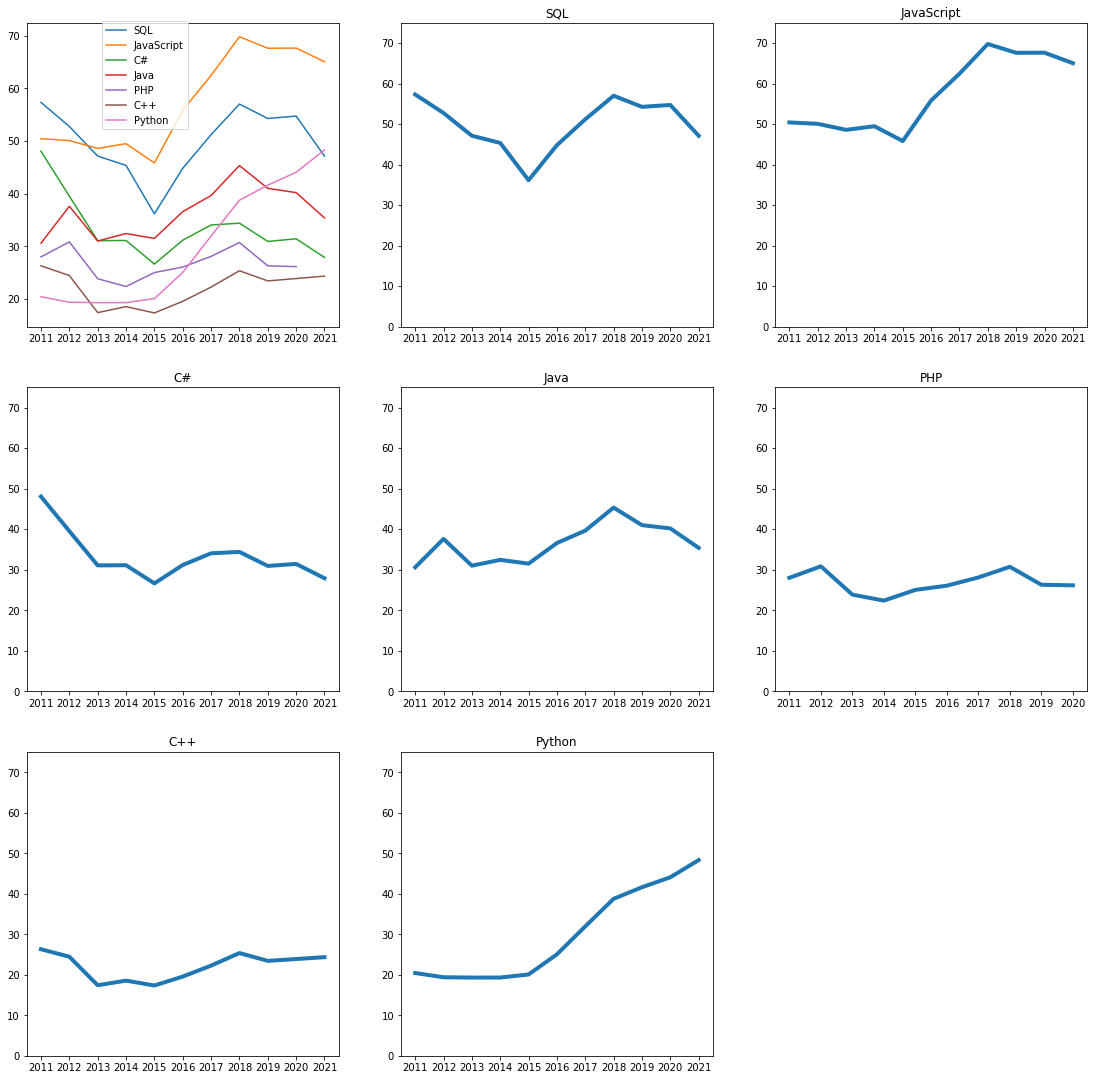

In [83]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19, 19))

plt.subplot(3, 3, 1)
for lang in cleaner_top_list:
    plt.plot(cleaner_top_list.index,
            cleaner_top_list[lang],
            label=lang)
plt.legend(loc=(0.24, 0.65))

for i, lang in zip(range(1, 8), cleaner_top_list):
    plt.subplot(3, 3, i+1)
    plt.plot(cleaner_top_list.index, 
             cleaner_top_list[lang],
             linewidth=4,
             label=lang)
    plt.ylim(0, 75)
    plt.title(lang)

plt.show()
    

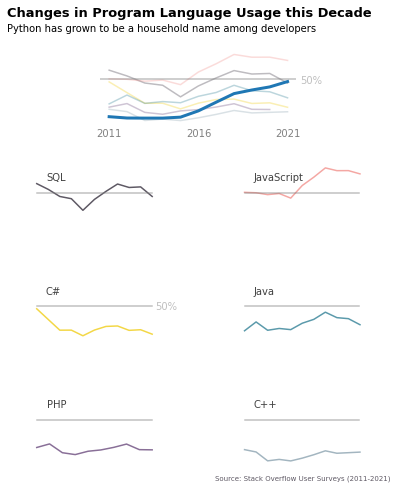

In [297]:
fig, ((axa, ax1, axa1, ax1, axb), (ax2, ax2, axc, ax3, ax3), (ax4, ax4, axd, ax5, ax5), (ax6, ax6, axe, ax7, ax7)) = plt.subplots(nrows=4, ncols=5,
                                        figsize=(6,8))

ax1 = plt.subplot2grid((4, 5), (0, 1), colspan=3)  
ax2 = plt.subplot2grid((4, 5), (1, 0), colspan=2) 
ax3 = plt.subplot2grid((4, 5), (1, 3), colspan=2)
ax4 = plt.subplot2grid((4, 5), (2, 0), colspan=2)
ax5 = plt.subplot2grid((4, 5), (2, 3), colspan=2)
ax6 = plt.subplot2grid((4, 5), (3, 0), colspan=2)
ax7 = plt.subplot2grid((4, 5), (3, 3), colspan=2)

sub_axes = [ax2, ax3, ax4, ax5, ax6, ax7]
blank_space = [axa, axb, axc, axd, axe]
location = ['right', 'top', 'left', 'bottom']
sub_ax_lang = ['SQL', 'JavaScript', 'C#', 'Java', 'PHP', 'C++']
colors = ['#282130', '#F18A85', '#EFCA08', '#24788F', '#613F75', '#849DAB']
#blank space parameters
for ax in blank_space:
    for spot in location:
        ax.spines[spot].set_visible(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0)

#sub axes parameters
for ax in sub_axes:
    for spot in location:
        ax.spines[spot].set_visible(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0)

for ax, lang, color in zip(sub_axes, sub_ax_lang, colors):
    ax.plot(cleaner_no_python.index, cleaner_no_python[lang], color=color, alpha=0.75)
    ax.set_ylim(0, 75)
    ax.text(0.8, 60, lang, alpha=0.75)
    ax.axhline(y=50, xmin=0.05, xmax=.95, c='grey', alpha=0.5)
ax4.text(10.3, 48, '50%', c='grey', alpha=0.5)

#Axis 1 parameters
for spot in location:
    ax1.spines[spot].set_visible(False)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.text(-0.7, 5, "2011", color='grey')
# ax1.text(1.3, 5, "2013", color='grey')
# ax1.text(3.3, 5, "2015", color='grey')
ax1.text(4.3, 5, "2016", color='grey')
# ax1.text(5.3, 5, "2017", color='grey')
# ax1.text(7.3, 5, "2019", color='grey')
ax1.text(9.3, 5, "2021", color='grey')
ax1.tick_params(bottom=0, left=0)
for lang, color in zip(cleaner_no_python, colors):
    ax1.plot(cleaner_no_python.index,
            cleaner_no_python[lang], color=color, alpha=0.3)
    ax1.set_ylim(0, 75)
ax1.plot(cleaner_no_python.index, cleaner_top_list['Python'], linewidth=3)
ax1.set_ylim(0, 75)
ax1.axhline(y=50, xmin=-0.3, xmax=10, c='grey', alpha=0.5)
ax1.text(10.7, 47, '50%', c='grey', alpha=0.5)

fig.text(0.07, 0.935, "Changes in Program Language Usage this Decade", size=13, weight='bold')
fig.text(0.07, 0.91, "Python has grown to be a household name among developers")
fig.text(0.55, 0.13, "Source: Stack Overflow User Surveys (2011-2021)", color='#282130', size=7, alpha=0.75)

plt.show()